# Human Detection in an aerial image


Instance segmentation using Mask R-CNN

<img src= "https://www.mydronelab.com/wp-content/uploads/2016/02/Drone-Flight-Time-810x515.jpg" >

### Install dependencies:
I have tested this file twice it works fine, just download whole package and run.   
incase it doesn't work follow these steps:  
1: check requirement file, if something not installed then remove '#' and run 2 cells below.  
2: cocoapi is the official git of coco dataset, If it doesn't work you can remove '#' to clone the git and   then make the package   
3: copy pycocotools to the root directory and run rest of code.

In [1]:
#!sudo apt-get install python3-pip

In [2]:
#!pip3 install -r requirements.txt

my folder path is '/home/chaudharyubuntu/Desktop/NewSpaceBanglore/',
change this to your folder location

In [1]:
cd /home/chaudharyubuntu/Desktop/testing/NewSpaceBanglore/

/home/chaudharyubuntu/Desktop/testing/NewSpaceBanglore


In [2]:
#!git clone https://github.com/cocodataset/cocoapi.git

Cloning into 'cocoapi'...
remote: Enumerating objects: 965, done.
remote: Total 965 (delta 0), reused 0 (delta 0), pack-reused 965
Receiving objects: 100% (965/965), 11.72 MiB | 2.22 MiB/s, done.
Resolving deltas: 100% (570/570), done.


In [3]:
#cd /home/chaudharyubuntu/Desktop/NewSpaceBanglore/cocoapi/PythonAPI/

/home/chaudharyubuntu/Desktop/NewSpaceBanglore/cocoapi/PythonAPI


In [4]:
#!make

python setup.py build_ext --inplace
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/home/chaudharyubuntu/.local/lib/python3.6/site-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /home/chaudharyubuntu/Desktop/NewSpaceBanglore/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.6
creating build/temp.linux-x86_64-3.6/pycocotools
gcc -pthread -B /home/chaudharyubuntu/anaconda3/envs/tensorflow1/compiler_compat -Wl,--sysroot=/ -Wsign-compare -DNDEBUG -g -fwrapv -O3 -Wall -Wstrict-prototypes -fPIC -I/home/chaudharyubuntu/.local/lib/python3.6/site-packages/numpy/core/include -I../common -I/home/chaudharyubuntu/anaconda3/envs/tensorflow1/include/python3.6m -c ../common/maskApi.c -o build/temp.linux-x86_64-3.

In [5]:
#cd /home/chaudharyubuntu/Desktop/NewSpaceBanglore/

/home/chaudharyubuntu/Desktop/NewSpaceBanglore


In [2]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt

# Root directory of the project
ROOT_DIR = os.path.abspath("./")

# Import Mask RCNN
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
# Import COCO config
import coco

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "images")

Using TensorFlow backend.


## Configurations

We'll be using a model trained on the MS-COCO dataset. The configurations of this model are in the ```CocoConfig``` class in ```coco.py```.

For inferencing, modify the configurations a bit to fit the task. To do so, sub-class the ```CocoConfig``` class and override the attributes you need to change.

In [3]:
class InferenceConfig(coco.CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

## Create Model and Load Trained Weights

In [4]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# Load weights trained on MS-COCO
model.load_weights(COCO_MODEL_PATH, by_name=True)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.


## Class Names

The 'person' class would get class ID = 1 (just like COCO) and the 'teddy bear' class is 78 (different from COCO). Keep that in mind when mapping class IDs to class names.

The index of the class name in the list represent its ID (first class is 0, second is 1, third is 2, ...etc.)

In [5]:
# COCO Class names
# Index of the class in the list is its ID. For example, to get ID of
# the teddy bear class, use: class_names.index('teddy bear')
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

## Run Object Detection

For improving the detections and predictions try to change hyperparameters like DETECTION_MIN_CONFIDENCE,  
DETECTION_NMS_THRESHOLD and Non-maximum Suppression

In [6]:
# IMAGE_DIR : directory for test images.
IMAGE_DIR = "/home/chaudharyubuntu/Desktop/NewSpaceBanglore/images/TopDownHumanDetection_4032x3024.jpg"

Processing 1 images
image                    shape: (3024, 4032, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 4032.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32



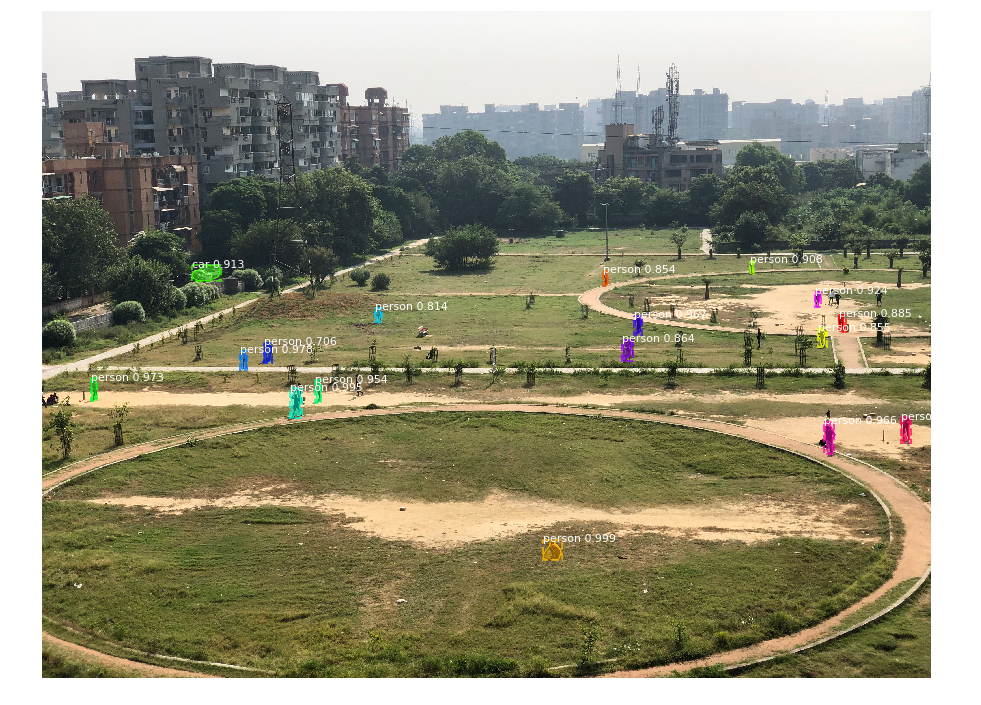

In [7]:
# Load a image from images folder
image = skimage.io.imread(IMAGE_DIR)

# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])


#### Instructions
Please run a detector on this image, which should be able to detect the number of
humans present in this image, draw a red bounding box around them, and mention the
probability of that detection. Save that output to disk.

In [ ]:
Predicted_bb = r['rois']

In [ ]:
from matplotlib import patches
def BoundingBoxes_withInformation(img, BoundingBox, class_ids, class_names, scores,
                                  saveLocation=os.path.join(ROOT_DIR, "output"), 
                                   figsize=(16, 16)):
    """
    img : image
    BoundingBox: all BoundingBox with (y1, x1, y2, x2) image coordinates.
    class_ids: [num_instances]
    class_names: list of class names of the dataset
    saveLocation: location for output image 
    scores: (optional) confidence scores for each box
    figsize: (optional) the size of the image
    """
    # Create figure and axes
    _, ax = plt.subplots(1, figsize=figsize)
    
    # Show area outside image boundaries.
    height, width = image.shape[:2]
    ax.set_ylim(height + 10, -10)
    ax.set_xlim(-10, width + 10)
    ax.axis('off')
    ax.set_title("Solution Picture")

    # Display the image
    ax.imshow(img)
    Objects = BoundingBox.shape[0]
    # numbers of Objects detected.
    heading = "No of detected Objects: {}".format(Objects)
    ax.text(0.5, 0.5, heading, fontsize=15)
    

    for i in range(Objects):
        y1, x1, y2, x2 = BoundingBox[i][0],BoundingBox[i][1],BoundingBox[i][2],BoundingBox[i][3]
        p = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=1,
                                  edgecolor='r', facecolor='none')
        ax.add_patch(p)
    
    
    # Label
        class_id = class_ids[i]
        probablity = scores[i] if scores is not None else None
        label = class_names[class_id]
        caption = "{} {:.3f}".format(label, probablity) if probablity else label
        ax.text(x1, y1 + 8, caption,
                color='w', size=10, backgroundcolor="none")

    plt.savefig(saveLocation)   
    plt.show()

In [ ]:
BoundingBoxes_withInformation(image, Predicted_bb, r['class_ids'], class_names, r['scores'])   

### Instructions
Calculate the net average IOU of the detections against the ground truth (note: the
image is not pre-labelled for ground truth, you’d have to do that yourself).

1: annotations using VGG Image Annotator https://www.robots.ox.ac.uk/~vgg/software/via/via_demo.html 

Data Annotations:  
we have been using ymin, xmin, ymax, xmax  
xmin, ymin, width, height from csv file exported using vgg image annotator

install dependencies for using csv file

In [ ]:
#!pip install pandas

In [ ]:
import pandas as pd
import re

annotations = pd.read_csv('/home/chaudharyubuntu/Desktop/NewSpaceBanglore/annotation/via_export_csv (2).csv')

df = pd.DataFrame(annotations) 
# using only 3 columns from all.
df[['region_id','region_shape_attributes','region_attributes']]

# getting numbers from strings in column:region_shape_attributes 
ground_bb_data=[]
for i in df.region_shape_attributes:
    temp = re.findall(r'\d+', i) 
    numbers = list(map(int, temp)) 
    ground_bb_data.append(numbers)

# converting text to ground_class_ids
df.loc[(df.region_attributes=='{"object":"person"}'),'region_attributes']=1
df.loc[(df.region_attributes=='{"object":"car"}'),'region_attributes']=3

ground_class_ids = df.region_attributes

In [ ]:
def groundbox_VS_predictedbox(img, Predicted_bb, ground_bb, class_ids, ground_class_ids,
                              class_names, scores,
                                  saveLocation=os.path.join(ROOT_DIR, "output_iou"), 
                                   figsize=(16, 16)):

    """
    img : image
    Predicted_bb, ground_bb: all BoundingBox with (y1, x1, y2, x2) image coordinates.
    ground_class_ids, class_ids: [num_instances]
    class_names: list of class names of the dataset
    saveLocation: location for output image 
    scores: (optional) confidence scores for each box
    figsize: (optional) the size of the image
    """
    # Create figure and axes
    _, ax = plt.subplots(1, figsize=figsize)
    
    # Show area outside image boundaries.
    height, width = image.shape[:2]
    ax.set_ylim(height + 10, -10)
    ax.set_xlim(-10, width + 10)
    ax.axis('off')
    ax.set_title("Picture with ground bounding box and predicted bounding box")

    # Display the image
    ax.imshow(img)
    Objects = Predicted_bb.shape[0]
    # numbers of Objects detected.
    heading = "No of detected Objects: {}".format(Objects)
    ax.text(0.5, 0.5, heading, fontsize=15)
    
    
    for i in range(Objects):
        # predicted bounding box
        y1, x1, y2, x2 = Predicted_bb[i][0],Predicted_bb[i][1],Predicted_bb[i][2],Predicted_bb[i][3]
        p = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=1,
                                  edgecolor='r', facecolor='none')
        ax.add_patch(p)
    
        # ground bounding box
        y ,x ,width, height = ground_bb[i][0],ground_bb[i][1],ground_bb[i][2],ground_bb[i][3]
        q = patches.Rectangle((x, y), width, height, linewidth=1,
                                  edgecolor='b', facecolor='none')
        ax.add_patch(q)
    
    
    # Label and probablity
        class_id = class_ids[i]
        probablity = scores[i] if scores is not None else None
        label = class_names[class_id]
        caption = "{} {:.3f}".format(label, probablity) if probablity else label
        ax.text(x1, y1 + 8, caption,
                color='w', size=10, backgroundcolor="none")
        
        # ground_class_ids
        class_id = ground_class_ids[i]
        label = class_names[class_id]
        caption = "{}".format(label) if probablity else label
        ax.text(x, y + 8, caption,
                color='w', size=10, backgroundcolor="none")
        

    plt.savefig(saveLocation)   
    plt.show()

In [ ]:
groundbox_VS_predictedbox(image, Predicted_bb, ground_bb_data, r['class_ids'], ground_class_ids,
                              class_names, r['scores'],
                                  saveLocation=os.path.join(ROOT_DIR, "output_iou"), 
                                   figsize=(16, 16))

In [ ]:
# functions to change bounding box types
def xmax_ymaxTOwidth_height(xmin,ymin,xmax,ymax):
    width, height = xmax-xmin+1, ymax-ymin+1
    return xmin,ymin, width, height
    
def width_heightTOxmax_ymax(xmin,ymin,width,height):
    xmax,ymax = width+xmin-1, width+ymin-1
    return xmin,ymin, xmax, ymax


we used ground bounding box with the width and height format, but for finding Intersection over Union   
we should convert these in same format as xmin,ymin,xmax,ymax

In [ ]:
N = len(ground_bb_data)
ground_bb_xmax_ymax= []
for i in range(N):
    result= width_heightTOxmax_ymax(ground_bb_data[i][0],ground_bb_data[i][1],ground_bb_data[i][2],ground_bb_data[i][3])
    ground_bb_xmax_ymax.append(result)


In [ ]:

def bb_intersection_over_union(ground_bb, Predicted_bb):
    '''
    bb = bounding box
     ground_bb = ground_bb_xmin, ground_bb_ymin, ground_bb_xmax, ground_bb_ymax
     Predicted_bb = Predicted_xmin, Predicted_ymin, Predicted_xmax, Predicted_ymax
     
    '''
    ground_bb_xmin, ground_bb_ymin, ground_bb_xmax, ground_bb_ymax = ground_bb[0],ground_bb[1],ground_bb[2],ground_bb[3]
    Predicted_xmin, Predicted_ymin, Predicted_xmax, Predicted_ymax = Predicted_bb[0],Predicted_bb[1],Predicted_bb[2],Predicted_bb[3]
    
    Intersection_Area_xmin = max(ground_bb_xmin, Predicted_xmin)
    Intersection_Area_ymin = max(ground_bb_ymin, Predicted_ymin)
    Intersection_Area_xmax = min(ground_bb_xmax, Predicted_xmax)
    Intersection_Area_ymax = min(ground_bb_ymax, Predicted_ymax) 
    
# compute the area of intersection rectangle
    Intersection_Area = max(0, Intersection_Area_xmax - Intersection_Area_xmin + 1) * max(0, Intersection_Area_ymax - Intersection_Area_ymin + 1)
# compute the area of both the prediction and ground-truth
# rectangles
    xmin,ymin, width, height = xmax_ymaxTOwidth_height(ground_bb_xmin, ground_bb_ymin, ground_bb_xmax, ground_bb_ymax)
    ground_bb_Area = width*height
    
    xmin,ymin, width, height = xmax_ymaxTOwidth_height(Predicted_xmin, Predicted_ymin, Predicted_xmax, Predicted_ymax)
    Predicted_bb_Area = width*height
# compute the intersection over union by taking the intersection
# area and dividing it by the sum of prediction + ground-truth
# areas - the interesection area
    iou = Intersection_Area / float(ground_bb_Area + Predicted_bb_Area - Intersection_Area)
# return the intersection over union value
    return iou

In [ ]:
N = Predicted_bb.shape[0]
iou = []
for i in range(N):
    result= bb_intersection_over_union(ground_bb_xmax_ymax[i], Predicted_bb[i])
    iou.append(result)

In [ ]:
iou

### Instructions:
Share the output (image with detections) and the calculated net avg IOU, as well as the   
project (when run locally, should produce the same output).

In [ ]:
average_iou=sum(iou)/len(iou)
print(average_iou)

## feel free to email at chandraveshchaudhari@gmail.com for any questions.